In [1]:
import pandas as pd
from tqdm.notebook import tqdm 
import gc
import numpy as np

In [2]:
import statistics as stat
def calculate_mode(x):
    try:
        moda=stat.mode(x)
    except:
        moda=np.nan
    return moda

## Load Bases

In [3]:
path = '../data'
y_train = pd.read_csv(f'{path}/y_train.csv', index_col = 'key_value')
# sunat_train = pd.read_csv(f'{path}/sunat_train.csv')
# rcc_train = pd.read_csv(f'{path}/rcc_train.csv')
# se_train = pd.read_csv(f'{path}/se_train.csv', index_col = 'key_value')
# sunat_test = pd.read_csv(f'{path}/sunat_test.csv')
# rcc_test = pd.read_csv(f'{path}/rcc_test.csv')
# se_test = pd.read_csv(f'{path}/se_test.csv', index_col = 'key_value')

## Procesar RCC

In [4]:
rcc_train = pd.read_csv(f'{path}/rcc_train.csv')
rcc_test = pd.read_csv(f'{path}/rcc_test.csv')

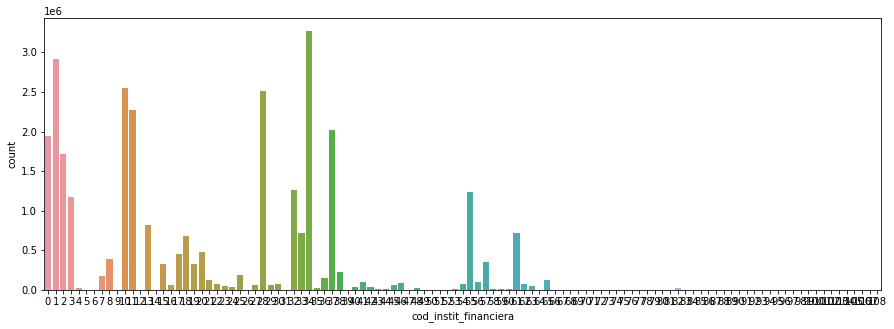

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = [15, 5]
sns.countplot(rcc_train.cod_instit_financiera)

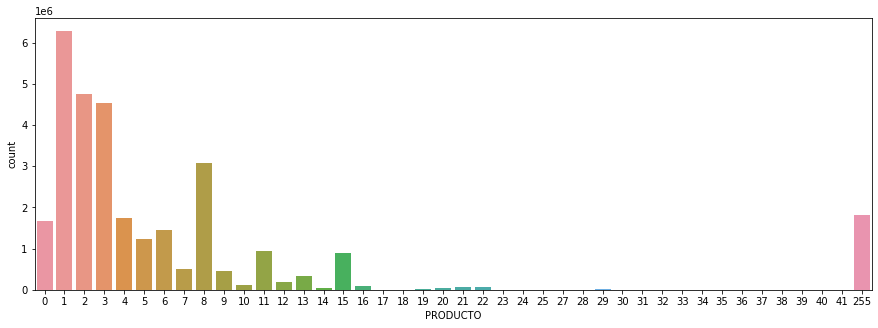

In [6]:
sns.countplot(rcc_train.PRODUCTO)

In [7]:
rcc_test['cod_instit_financiera'].fillna(rcc_test['cod_instit_financiera'].value_counts().index[0], inplace=True)
rcc_test['PRODUCTO'].fillna(rcc_test['PRODUCTO'].value_counts().index[0], inplace=True)

In [8]:
dict_ = {'codmes': 'int32',
 'key_value': 'int32',
 'condicion': 'int32',
 'tipo_credito': 'int32',
 'cod_instit_financiera': 'int32',
 'PRODUCTO': 'int32',
 'RIESGO_DIRECTO': 'int32',
 'COD_CLASIFICACION_DEUDOR': 'int32'}
rcc_train = rcc_train.astype(dict_)
rcc_test = rcc_test.astype(dict_)

In [12]:
rcc_train.saldo.min()

-0.07289224159199438

In [13]:
moda=lambda x: calculate_mode(x)
moda.__name__='mode'
agg_rcc = {'condicion':['max','min','mean','std','sum'],
           'saldo':['max','min','mean','std','sum'],
           'cod_instit_financiera':['nunique','min','max',moda],
           'PRODUCTO':['nunique','min','max',moda],
           'COD_CLASIFICACION_DEUDOR':['nunique','max','min','sum','mean','std',moda],
           'RIESGO_DIRECTO':['nunique','max','min','sum','mean','std',moda],
           'tipo_credito':['nunique','max','min','sum','mean','std',moda]
          }

In [14]:
list_rcc_train_agg = []
for n,i in enumerate(tqdm(sorted(set(rcc_train.codmes),reverse=True))):
    if n in [0,1,2,3,4,5,11]:
        for c in ['tipo_credito','RIESGO_DIRECTO','COD_CLASIFICACION_DEUDOR']:
            print(f'haciendo {c}')
            rcc_train_agg = rcc_train[rcc_train.codmes>=i].groupby(['key_value', c]).saldo.sum().unstack(level = 1, fill_value=-0.07289224159199438)
            rcc_train_agg.columns = [f'{rcc_train_agg.columns.name}_{c}_saldo_ult{n+1}meses' for c in rcc_train_agg.columns]
            list_rcc_train_agg.append(rcc_train_agg)
            gc.collect()
        for c in ['tipo_credito','RIESGO_DIRECTO','COD_CLASIFICACION_DEUDOR']:
            print(f'haciendo {c}')
            rcc_train_agg = rcc_train[rcc_train.codmes>=i].groupby(['key_value', c]).condicion.sum().unstack(level = 1, fill_value=0)
            rcc_train_agg.columns = [f'{rcc_train_agg.columns.name}_{c}_condicion_ult{n+1}meses' for c in rcc_train_agg.columns]
            list_rcc_train_agg.append(rcc_train_agg)
            gc.collect()

        print(f'haciendo aggregate de {i}')
        rcc_train_agg = rcc_train[rcc_train.codmes>=i].groupby('key_value').agg(agg_rcc)
        rcc_train_agg.columns = [i+'_'+j+f'_ult{n+1}mes' for i,j in rcc_train_agg.columns]
        list_rcc_train_agg.append(rcc_train_agg)
        gc.collect()

rcc_train_ = pd.concat(list_rcc_train_agg, axis=1)
del rcc_train, list_rcc_train_agg

haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo aggregate de 201802
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo aggregate de 201801
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo aggregate de 201712
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo aggregate de 201711
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo aggregate de 201710
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo 

In [15]:
list_rcc_test_agg = []
for n,i in enumerate(tqdm(sorted(set(rcc_test.codmes),reverse=True))):
    if n in [0,1,2,3,4,5,11]:
        for c in ['tipo_credito','RIESGO_DIRECTO','COD_CLASIFICACION_DEUDOR']:
            print(f'haciendo {c}')
            rcc_test_agg = rcc_test[rcc_test.codmes>=i].groupby(['key_value', c]).saldo.sum().unstack(level = 1, fill_value=-0.07289224159199438)
            rcc_test_agg.columns = [f'{rcc_test_agg.columns.name}_{c}_saldo_ult{n+1}meses' for c in rcc_test_agg.columns]
            list_rcc_test_agg.append(rcc_test_agg)
            gc.collect()
        for c in ['tipo_credito','RIESGO_DIRECTO','COD_CLASIFICACION_DEUDOR']:
            print(f'haciendo {c}')
            rcc_test_agg = rcc_test[rcc_test.codmes>=i].groupby(['key_value', c]).condicion.sum().unstack(level = 1, fill_value=0)
            rcc_test_agg.columns = [f'{rcc_test_agg.columns.name}_{c}_condicion_ult{n+1}meses' for c in rcc_test_agg.columns]
            list_rcc_test_agg.append(rcc_test_agg)
            gc.collect()
        print(f'haciendo aggregate de {i}')
        rcc_test_agg = rcc_test[rcc_test.codmes>=i].groupby('key_value').agg(agg_rcc)
        rcc_test_agg.columns = [i+'_'+j+f'_ult{n+1}mes' for i,j in rcc_test_agg.columns]
        list_rcc_test_agg.append(rcc_test_agg)
        gc.collect()

rcc_test_ = pd.concat(list_rcc_test_agg, axis=1)
del rcc_test, list_rcc_test_agg

haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo aggregate de 201902
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo aggregate de 201901
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo aggregate de 201812
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo aggregate de 201811
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo aggregate de 201810
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo 

In [16]:
rcc_train_.isna().sum().sort_values().tail(40)/len(rcc_train_)

COD_CLASIFICACION_DEUDOR_std_ult2mes     0.002876
RIESGO_DIRECTO_std_ult2mes               0.002876
saldo_std_ult2mes                        0.002876
tipo_credito_std_ult1mes                 0.003674
condicion_std_ult1mes                    0.003674
COD_CLASIFICACION_DEUDOR_std_ult1mes     0.003674
saldo_std_ult1mes                        0.003674
RIESGO_DIRECTO_std_ult1mes               0.003674
COD_CLASIFICACION_DEUDOR_mode_ult3mes    0.004293
COD_CLASIFICACION_DEUDOR_mode_ult2mes    0.006028
COD_CLASIFICACION_DEUDOR_mode_ult6mes    0.006357
COD_CLASIFICACION_DEUDOR_mode_ult1mes    0.007308
tipo_credito_mode_ult12mes               0.007836
tipo_credito_mode_ult6mes                0.011766
tipo_credito_mode_ult5mes                0.012918
tipo_credito_mode_ult4mes                0.016829
tipo_credito_mode_ult3mes                0.021485
cod_instit_financiera_mode_ult12mes      0.021616
tipo_credito_mode_ult2mes                0.030936
RIESGO_DIRECTO_mode_ult12mes             0.038749


In [17]:
### asegurar que las columnas esten en ambas bases (train/test)
print(rcc_train_.shape, rcc_test_.shape)
keep_columns = list(set(rcc_train_.columns).intersection(rcc_test_.columns))
rcc_train_ = rcc_train_[keep_columns].copy()
rcc_test_ = rcc_test_[keep_columns].copy()
print(rcc_train_.shape, rcc_test_.shape)

(358487, 539) (396666, 553)
(358487, 539) (396666, 539)


#### guardando archivo procesado de RCC

In [4]:
## guardando archivo procesado de rcc
# rcc_train_.to_csv('../data/intermediate/rcc_train_v2.csv')
# rcc_test_.to_csv('../data/intermediate/rcc_test_v2.csv')
# ### cargando archivo procesado de rcc
rcc_train_ = pd.read_csv('../data/intermediate/rcc_train_v2.csv', index_col='key_value')
rcc_test_ = pd.read_csv('../data/intermediate/rcc_test_v2.csv',index_col='key_value')

In [5]:
### imputar datos categoricos
var_categ = [i for i in rcc_train_.columns if 'mode' in i]
for i in var_categ:
    rcc_train_[i] = rcc_train_[i].fillna(rcc_train_[i].value_counts().index[0])
    rcc_test_[i] = rcc_test_[i].fillna(rcc_train_[i].value_counts().index[0])

In [6]:
### mean encoding
rcc_train_ = pd.concat([rcc_train_, y_train], axis=1)
for i in var_categ:
    me = rcc_train_.groupby([i])['target'].mean().to_dict() 
    rcc_train_[f'{i}_me'] =  rcc_train_[i].map(me) 
    rcc_test_[f'{i}_me'] =  rcc_test_[i].map(me)
    ### imputar datos faltantes
    rcc_test_[f'{i}_me'] =  rcc_test_[f'{i}_me'].fillna(rcc_train_[f'{i}_me'].median())
    
    
rcc_train_.drop('target', axis=1, inplace=True)
rcc_train_.drop(var_categ, axis=1, inplace=True)
rcc_test_.drop(var_categ, axis=1, inplace=True)

In [7]:
### unir RCC en la base final
train = rcc_train_.copy()
test = rcc_test_.copy()
del rcc_train_, rcc_test_

## Procesar SE

In [ ]:
se_train = pd.read_csv(f'{path}/se_train.csv', index_col = 'key_value')
se_test = pd.read_csv(f'{path}/se_test.csv', index_col = 'key_value')

In [43]:
dict_ = {'sexo':'int32',
         'est_cvl':'int32',
         'sit_lab':'int32',
         'cod_ocu':'int32',
         'ctd_hijos':'int32',
         'flg_sin_email':'int32',
         'ctd_veh':'int32',
         'lgr_vot':'int32',
         'prv':'int32',
         'dto':'int32',
         'rgn':'int32',
         'tip_lvledu':'int32'}
se_train = se_train.astype(dict_)
se_test = se_test.astype(dict_)

In [44]:
### imputar datos faltantes en la base se_[train/test]
se_train['edad'].fillna(se_train['edad'].median(), inplace=True)
se_test['edad'].fillna(se_train['edad'].median(), inplace=True)
se_train['cod_ubi'].fillna(se_train['cod_ubi'].median(), inplace=True)
se_test['cod_ubi'].fillna(se_train['cod_ubi'].median(), inplace=True)

In [45]:
### mean encoding
var_categ=['sit_lab','lgr_vot','sexo','rgn','tip_lvledu','flg_sin_email','prv','est_cvl','cod_ocu','dto']
# var_caunti=['edad','ctd_hijos','ctd_veh','cod_ubi']
se_train['target'] = y_train.loc[se_train.index]
for i in var_categ:
    me = se_train.groupby([i])['target'].mean().to_dict() 
    se_train[f'{i}_me'] =  se_train[i].map(me) 
    se_test[f'{i}_me'] =  se_test[i].map(me)
    ### imputar datos faltantes
    se_test[f'{i}_me'] =  se_test[f'{i}_me'].fillna(se_train[f'{i}_me'].median())
se_train.drop('target', axis=1, inplace=True)
se_train.drop(var_categ, axis=1, inplace=True)
se_test.drop(var_categ, axis=1, inplace=True)

#### guardando archivo procesado de SE

In [8]:
### guardando archivo procesado de se
# se_train.to_csv('../data/intermediate/se_train.csv')
# se_test.to_csv('../data/intermediate/se_test.csv')
### cargando archivo procesado de se
se_train = pd.read_csv('../data/intermediate/se_train.csv', index_col='key_value')
se_test = pd.read_csv('../data/intermediate/se_test.csv',index_col='key_value')

In [9]:
### unir SE en la base final
train = train.join(se_train) 
test = test.join(se_test)
del se_train, se_test

In [10]:
## imputar valores faltantes
var_caunti = ['lgr_vot_me','sit_lab_me','cod_ubi','tip_lvledu_me','prv_me','rgn_me',
 'ctd_hijos','edad','cod_ocu_me','ctd_veh','est_cvl_me','dto_me','flg_sin_email_me','sexo_me']
for i in var_caunti:
    train[i] = train[i].fillna(train[i].median())
    test[i] = test[i].fillna(train[i].median())

## Procesar SUNAT

In [ ]:
sunat_train = pd.read_csv(f'{path}/sunat_train.csv')
sunat_test = pd.read_csv(f'{path}/sunat_test.csv')

In [22]:
### eliminar registros duplicados
sunat_train.drop_duplicates(inplace=True)
sunat_test.drop_duplicates(inplace=True)
sunat_train.shape, sunat_test.shape

((292479, 18), (318821, 18))

In [23]:
#### eliminando registros con fecalta y fecbaja con valores nulos
mask = ~((sunat_train['fecalta'].astype('str')=='nan') & (sunat_train['fecbaja'].astype('str')=='nan'))
sunat_train = sunat_train[mask].copy()
mask = ~((sunat_test['fecalta'].astype('str')=='nan') & (sunat_test['fecbaja'].astype('str')=='nan'))
sunat_test = sunat_test[mask].copy()
sunat_train.shape, sunat_test.shape

((272028, 18), (293080, 18))

In [24]:
dict_ = {'tipcontribuyente': 'int32',
         'tippersona': 'int32',
         'ciiu': 'int32',
         'ubigeo': 'int32',
         'condiciondomicilio': 'int32',
         'estadocontribuyente': 'int32',
         'codvia': 'int32',
         'codzona': 'int32',
         'contabilidad': 'int32',
         'facturacion': 'int32',
         'domiciliado': 'int32',
         'comercioexterior': 'int32',
         'cargorele': 'int32',
         'codentidadtributo': 'int32',
         'estadotributo': 'int32'}
sunat_train = sunat_train.astype(dict_)
sunat_test = sunat_test.astype(dict_)

In [25]:
sunat_train['diff_fech'] = sunat_train['fecbaja'] - sunat_train['fecalta']
sunat_test['diff_fech'] = sunat_test['fecbaja'] - sunat_test['fecalta']

In [26]:
moda=lambda x: calculate_mode(x)
moda.__name__='mode'
agg_sunat = {'tipcontribuyente':['nunique',moda],
           'tippersona':['nunique',moda],
           'ciiu':['nunique', moda],
           'ubigeo':['nunique',moda],
           'condiciondomicilio':['nunique',moda],
           'estadocontribuyente':['nunique',moda],
           'codvia':['nunique',moda],
           'codzona':['nunique',moda],
           'contabilidad':['nunique',moda],
           'facturacion':['nunique',moda],
           'domiciliado':['nunique',moda],
           'comercioexterior':['nunique',moda],
           'cargorele':['nunique',moda],
           'codentidadtributo':['nunique',moda],
           'estadotributo':['nunique',moda],
           'fecalta':['mean','max', 'nunique'],
           'fecbaja':['mean','max', 'nunique'], 
           'diff_fech':['mean','max', 'nunique'], 
            }

sunat_train_ = sunat_train.groupby('key_value').agg(agg_sunat)
sunat_train_.columns = [i+'_'+j for i,j in sunat_train_.columns]
sunat_test_ = sunat_test.groupby('key_value').agg(agg_sunat)
sunat_test_.columns = [i+'_'+j for i,j in sunat_test_.columns]
del sunat_train, sunat_test

#### guardando archivo procesado de SUNAT

In [11]:
### guardando archivo procesado de sunat
# sunat_train_.to_csv('../data/intermediate/sunat_train.csv')
# sunat_test_.to_csv('../data/intermediate/sunat_test.csv')
### cargando archivo procesado de sunat
sunat_train_ = pd.read_csv('../data/intermediate/sunat_train.csv', index_col='key_value')
sunat_test_ = pd.read_csv('../data/intermediate/sunat_test.csv',index_col='key_value')

In [25]:
# var_categ = [i for i in sunat_train_.columns if 'mode' in i]
# for i in var_categ:
#     sunat_train_[i] = sunat_train_[i].fillna(sunat_train_[i].value_counts().index[0])
#     sunat_test_[i] = sunat_test_[i].fillna(sunat_train_[i].value_counts().index[0])

In [26]:
# sunat_train_['target'] = y_train.loc[sunat_train_.index]
# for i in var_categ:
#     me = sunat_train_.groupby([i])['target'].mean().to_dict() 
#     sunat_train_[f'{i}_me'] =  sunat_train_[i].map(me) 
#     sunat_test_[f'{i}_me'] =  sunat_test_[i].map(me)
#     ### imputar datos faltantes
#     sunat_test_[f'{i}_me'] =  sunat_test_[f'{i}_me'].fillna(sunat_train_[f'{i}_me'].median())
# sunat_train_.drop('target', axis=1, inplace=True)
# sunat_train_.drop(var_categ, axis=1, inplace=True)
# sunat_test_.drop(var_categ, axis=1, inplace=True)

In [16]:
### unir SUNAT en la base final
train = train.join(sunat_train_)
test = test.join(sunat_test_)
del sunat_train_, sunat_test_

In [17]:
test.isna().sum().sort_values().tail(40)/len(test)

COD_CLASIFICACION_DEUDOR_std_ult1mes    0.003855
fecbaja_nunique                         0.422910
fecalta_nunique                         0.422910
fecalta_max                             0.422910
fecalta_mean                            0.422910
estadotributo_nunique                   0.422910
codentidadtributo_nunique               0.422910
cargorele_nunique                       0.422910
comercioexterior_nunique                0.422910
domiciliado_nunique                     0.422910
facturacion_nunique                     0.422910
contabilidad_nunique                    0.422910
codzona_nunique                         0.422910
diff_fech_nunique                       0.422910
tipcontribuyente_nunique                0.422910
estadocontribuyente_nunique             0.422910
tippersona_nunique                      0.422910
condiciondomicilio_nunique              0.422910
ubigeo_nunique                          0.422910
codvia_nunique                          0.422910
ciiu_nunique        

## Training

In [18]:
train.isna().sum()[train.isna().sum()>0].shape, test.isna().sum()[test.isna().sum()>0].shape

((74,), (74,))

In [19]:
train.shape, test.shape

((358487, 592), (396666, 592))

In [ ]:
### sin imputar nada con 132 variables con valores faltantes
# bestTest = 0.846083257
# bestIteration = 389

### imputando solo las variables con sufijo "mode" de la base del rcc con 88 variables con valores faltante
# bestTest = 0.8450199372
# bestIteration = 372

### imputando solo las variables con edad, cod_ubi de la base del SE con 123 variables con valores faltante
# bestTest = 0.8455150989
# bestIteration = 444

### imputando solo las variables con edad, cod_ubi de la base del SE con 123 variables con valores faltante. Aplicando mean_encoding en se
# bestTest = 0.8504518067
# bestIteration = 590
# roc auc estimado:  0.8480459539406775
# roc auc varianza:  0.0009620235635683943

### imputando solo las variables con edad, cod_ubi de la base del SE con 109 variables con valores faltante. Aplicando mean_encoding en se y imputando los valores faltantes de SE en la base final
# bestTest = 0.8491056841
# bestIteration = 379
# roc auc estimado:  0.8480979032078084 con catboost
# roc auc varianza:  0.0009058083887458872 con catboost
# roc auc estimado:  0.8501708741190802 con lightgbm
# roc auc varianza:  0.0007416701421262065 con lightgbm

### imputando solo las variables con edad, cod_ubi de la base del SE con 109 variables con valores faltante. Aplicando mean_encoding en se y imputando los valores faltantes de se en la base final
### tambien imputando variable de sufijo "mode" de la SUNAT
# bestTest = 0.8498253857
# bestIteration = 467
# roc auc estimado:  0.8479018148660604
# roc auc varianza:  0.0009496662950653975

### imputando solo las variables con edad, cod_ubi de la base del SE con 109 variables con valores faltante. Aplicando mean_encoding en se y imputando los valores faltantes de se en la base final
### tambien imputando variable de sufijo "mode" de la SUNAT. Aplicando mean_encoding en Sunat
# bestTest = 0.8517744228
# bestIteration = 490
# roc auc estimado:  0.8498754297537698 con catboost
# roc auc varianza:  0.0008430024442457468 con catboost
# roc auc estimado:  0.8523046841544446 con lightgbm
# roc auc varianza:  0.0007705102440034088 con lightgbm
############## pero en la tabla publica sale 0.83994. Se sobreajusta en 0.2 comparado al sin usar el mean_encoding en SUNAT

In [20]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import numpy as np
folds = [train.index[t] for t, v in KFold(5).split(train)]
test_probs = []
train_probs = []
fi = []
for i, idx in enumerate(folds):
    print("*"*10, i, "*"*10)
    Xt = train.loc[idx]
    yt = y_train.loc[Xt.index]

    Xv = train.drop(Xt.index)
    yv = y_train.loc[Xv.index]

    learner = CatBoostClassifier(n_estimators=1000,  eval_metric = 'AUC', max_depth = 6)
    learner.fit(Xt, yt,  early_stopping_rounds=10, 
                eval_set=[(Xt, yt), (Xv, yv)], verbose=50)
    test_probs.append(pd.Series(learner.predict_proba(test)[:, -1], index=test.index, name="fold_" + str(i)))
    train_probs.append(pd.Series(learner.predict_proba(Xv)[:, -1], index=Xv.index, name="probs"))
    fi.append(pd.Series(learner.feature_importances_ / learner.feature_importances_.sum(), index=Xt.columns))
    gc.collect()
test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
train_probs = pd.concat(train_probs)
fi = pd.concat(fi, axis=1).mean(axis=1)
print("*" * 21)
print("roc auc estimado: ", roc_auc_score(y_train, train_probs.loc[y_train.index]))
print("roc auc varianza: ", np.std([roc_auc_score(y_train.loc[folds[i]], train_probs.iloc[folds[i]]) for i in range(len(folds))]))

********** 0 **********
Learning rate set to 0.128212
0:	test: 0.7534596	test1: 0.7544221	best: 0.7544221 (0)	total: 367ms	remaining: 6m 6s
50:	test: 0.8311541	test1: 0.8295446	best: 0.8295446 (50)	total: 19.8s	remaining: 6m 7s
100:	test: 0.8406618	test1: 0.8380354	best: 0.8380354 (100)	total: 38.5s	remaining: 5m 42s
150:	test: 0.8472149	test1: 0.8428172	best: 0.8428172 (150)	total: 56.2s	remaining: 5m 16s
200:	test: 0.8518900	test1: 0.8456344	best: 0.8456428 (198)	total: 1m 13s	remaining: 4m 53s
250:	test: 0.8557475	test1: 0.8471491	best: 0.8471491 (250)	total: 1m 31s	remaining: 4m 32s
300:	test: 0.8590166	test1: 0.8482151	best: 0.8482151 (300)	total: 1m 48s	remaining: 4m 12s
350:	test: 0.8624134	test1: 0.8491943	best: 0.8492037 (348)	total: 2m 6s	remaining: 3m 53s
400:	test: 0.8652837	test1: 0.8498316	best: 0.8498397 (399)	total: 2m 23s	remaining: 3m 34s
450:	test: 0.8678249	test1: 0.8501603	best: 0.8501603 (450)	total: 2m 40s	remaining: 3m 15s
Stopped by overfitting detector  (10 it

In [21]:
fi.to_pickle('fi_catboost_v2.pkl')
fi = pd.read_pickle('fi_catboost_v2.pkl')
features_importances_350 = list(fi.sort_values(ascending=False).head(350).index)
len(features_importances_350)

350

In [22]:
fi.sort_values(ascending=False).head(50)

dto_me                                        0.052611
COD_CLASIFICACION_DEUDOR_mean_ult1mes         0.036274
tipo_credito_sum_ult12mes                     0.027382
tip_lvledu_me                                 0.023674
cod_instit_financiera_mode_ult1mes_me         0.023567
tipo_credito_11_saldo_ult1meses               0.017357
RIESGO_DIRECTO_sum_ult12mes                   0.016835
edad                                          0.016553
COD_CLASIFICACION_DEUDOR_max_ult1mes          0.016468
RIESGO_DIRECTO_1_saldo_ult1meses              0.015517
COD_CLASIFICACION_DEUDOR_sum_ult1mes          0.014476
COD_CLASIFICACION_DEUDOR_0_saldo_ult1meses    0.012836
sexo_me                                       0.012745
COD_CLASIFICACION_DEUDOR_nunique_ult1mes      0.012686
flg_sin_email_me                              0.011990
cod_instit_financiera_mode_ult2mes_me         0.011952
RIESGO_DIRECTO_mean_ult1mes                   0.011782
sit_lab_me                                    0.011006
saldo_sum_

In [23]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import numpy as np
folds = [train.index[t] for t, v in KFold(5).split(train)]
test_probs = []
train_probs = []
fi = []
for i, idx in enumerate(folds):
    print("*"*10, i, "*"*10)
    Xt = train.loc[idx]
    yt = y_train.loc[Xt.index]

    Xv = train.drop(Xt.index)
    yv = y_train.loc[Xv.index]

    learner = LGBMClassifier(n_estimators=1000, max_depth = 6, boosting_type='gbdt', min_child_samples=1000)
    learner.fit(Xt, yt,  early_stopping_rounds=10, eval_metric="auc",
                eval_set=[(Xt, yt), (Xv, yv)], verbose=50)
    test_probs.append(pd.Series(learner.predict_proba(test)[:, -1], index=test.index, name="fold_" + str(i)))
    train_probs.append(pd.Series(learner.predict_proba(Xv)[:, -1], index=Xv.index, name="probs"))
    fi.append(pd.Series(learner.feature_importances_ / learner.feature_importances_.sum(), index=Xt.columns))

test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
train_probs = pd.concat(train_probs)
fi = pd.concat(fi, axis=1).mean(axis=1)
print("*" * 21)
print("roc auc estimado: ", roc_auc_score(y_train, train_probs.loc[y_train.index]))
print("roc auc varianza: ", np.std([roc_auc_score(y_train.loc[folds[i]], train_probs.iloc[folds[i]]) for i in range(len(folds))]))  

********** 0 **********


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.841655	training's binary_logloss: 0.304141	valid_1's auc: 0.835215	valid_1's binary_logloss: 0.309104
[100]	training's auc: 0.854053	training's binary_logloss: 0.294389	valid_1's auc: 0.844209	valid_1's binary_logloss: 0.302268
[150]	training's auc: 0.86064	training's binary_logloss: 0.289102	valid_1's auc: 0.847558	valid_1's binary_logloss: 0.299514
[200]	training's auc: 0.865472	training's binary_logloss: 0.285274	valid_1's auc: 0.849356	valid_1's binary_logloss: 0.298063
[250]	training's auc: 0.869507	training's binary_logloss: 0.282073	valid_1's auc: 0.850361	valid_1's binary_logloss: 0.297219
[300]	training's auc: 0.873002	training's binary_logloss: 0.279262	valid_1's auc: 0.851193	valid_1's binary_logloss: 0.296579
[350]	training's auc: 0.87578	training's binary_logloss: 0.27696	valid_1's auc: 0.851708	valid_1's binary_logloss: 0.296163
[400]	training's auc: 0.879162	training's binary_logloss: 0.2

In [24]:
fi.to_pickle('fi_lightgbm_v2.pkl')
fi = pd.read_pickle('fi_lightgbm_v2.pkl')
features_importances_350 = list(fi.sort_values(ascending=False).head(350).index)
len(features_importances_350)

350

In [25]:
fi.sort_values(ascending=False).head(50)

dto_me                                         0.024319
tipo_credito_sum_ult12mes                      0.020010
edad                                           0.018427
RIESGO_DIRECTO_1_saldo_ult1meses               0.015837
cod_ubi                                        0.014734
tipo_credito_sum_ult1mes                       0.013510
RIESGO_DIRECTO_sum_ult12mes                    0.013222
RIESGO_DIRECTO_1_saldo_ult12meses              0.013037
RIESGO_DIRECTO_-1_saldo_ult1meses              0.012439
cod_instit_financiera_max_ult1mes              0.012075
saldo_mean_ult12mes                            0.012040
cod_instit_financiera_mode_ult12mes_me         0.011555
cod_instit_financiera_mode_ult1mes_me          0.011234
RIESGO_DIRECTO_mean_ult1mes                    0.011092
saldo_min_ult1mes                              0.010581
ubigeo_mode                                    0.010542
tipo_credito_11_saldo_ult1meses                0.010423
tip_lvledu_me                                  0

In [26]:
from catboost import CatBoostClassifier
learner_catboost = CatBoostClassifier(n_estimators=1000, eval_metric = 'AUC', max_depth = 6)
learner_catboost.fit(train, y_train,  early_stopping_rounds=10, verbose=False)

In [27]:
from lightgbm import LGBMClassifier
learner_lightgbm = LGBMClassifier(n_estimators=1000, max_depth=6, boosting_type='gbdt', min_child_samples=1000)
learner_lightgbm.fit(train, y_train, eval_metric="auc", verbose=False)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMClassifier(max_depth=6, min_child_samples=1000, n_estimators=1000)

In [28]:
test_probs_catboost = pd.Series(learner_catboost.predict_proba(test)[:, -1], index=test.index, name="target")
test_probs_lightgbm = pd.Series(learner_lightgbm.predict_proba(test)[:, -1], index=test.index, name="target")
test_probs_mean = test_probs_catboost*0.4 + test_probs_lightgbm*0.6
test_probs_mean.name = 'target'
test_probs_mean.shape

(396666,)

In [29]:
test_probs_mean.to_csv("../results/test70.csv")

In [30]:
mkdir /root/.kaggle/

In [31]:
cp ../kaggle.json /root/.kaggle/

In [32]:
!kaggle competitions submit -c interbank20 -f ../results/test70.csv -m "test 70"

100%|██████████████████████████████████████| 10.1M/10.1M [00:04<00:00, 2.16MB/s]
Successfully submitted to Datathon Internacional Interbank 2020

In [33]:
from catboost import CatBoostClassifier
fi = pd.read_pickle('fi_catboost_v2.pkl')
features_importances_350_catboost = list(fi.sort_values(ascending=False).head(350).index)
learner_catboost = CatBoostClassifier(n_estimators=1000, eval_metric = 'AUC', max_depth = 6)
learner_catboost.fit(train[features_importances_350_catboost], y_train,  early_stopping_rounds=10, verbose=False)

In [34]:
from lightgbm import LGBMClassifier
fi = pd.read_pickle('fi_lightgbm_v2.pkl')
features_importances_350_lightgbm = list(fi.sort_values(ascending=False).head(350).index)
learner_lightgbm = LGBMClassifier(n_estimators=1000, max_depth=6, boosting_type='gbdt', min_child_samples=1000)
learner_lightgbm.fit(train[features_importances_350_lightgbm], y_train, eval_metric="auc", verbose=True)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMClassifier(max_depth=6, min_child_samples=1000, n_estimators=1000)

In [35]:
test_probs_catboost = pd.Series(learner_catboost.predict_proba(test[features_importances_350_catboost])[:, -1], index=test.index, name="target")
test_probs_lightgbm = pd.Series(learner_lightgbm.predict_proba(test[features_importances_350_lightgbm])[:, -1], index=test.index, name="target")
test_probs_mean = test_probs_catboost*0.4 + test_probs_lightgbm*0.6
test_probs_mean.name = 'target'
test_probs_mean.shape

(396666,)

In [36]:
test_probs_mean.to_csv("../results/test71.csv")

In [37]:
mkdir /root/.kaggle/

In [38]:
cp ../kaggle.json /root/.kaggle/

In [39]:
!kaggle competitions submit -c interbank20 -f ../results/test71.csv -m "test 71"

100%|██████████████████████████████████████| 10.1M/10.1M [00:03<00:00, 3.53MB/s]
Successfully submitted to Datathon Internacional Interbank 2020